# FINTECH Quant Trading Lecture03

In [13]:
import os
import sys
import warnings
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")
matplotlib.rcParams['font.family'] = 'serif'
warnings.filterwarnings('ignore')
path = os.path.dirname(os.getcwd())
sys.path.append(path)
fig_folder = "QT_Lecture_03"

# ------ 存放数据的文件夹 ------ #
lecturedata_path = os.path.join(path, 'resources', 'lecturedata')
homeworkdata_path = os.path.join(path, 'resources', 'homeworkdata')
if not os.path.exists(lecturedata_path):
    os.mkdir(lecturedata_path)
else:
    pass
if not os.path.exists(homeworkdata_path):
    os.mkdir(homeworkdata_path)
else:
    pass

from common.filesio import FilesIO
from common.figsio import FiguresIO

In [5]:
def parse_input(row_data: pd.DataFrame) -> pd.DataFrame:

    """
    解析股票数据
    """
    
    data = row_data[[
        'Stkcd', 'Trddt', 'Opnprc','Hiprc', 'Loprc',
        'Clsprc', 'Dretwd', 'Dnshrtrd', 'Dnvaltrd', 
        'Dsmvosd', 'Dsmvtll', 'Trdsta',
    ]]
    data["Stkcd"] = data["Stkcd"].map(lambda x: '{:06d}'.format(x))
    data.rename(
        columns = {
            'Stkcd':'Code', 'Trddt':'Date', 'Opnprc':'Open',
            'Hiprc':'High', 'Loprc':'Low',
            'Clsprc':'Close', 'Dretwd':'Ret', 'Dnshrtrd':'Vol', 
            'Dnvaltrd':'Amount', 'Dsmvosd': 'Cir_Mar_Val', 
            'Dsmvtll': 'Total_Mar_Val', 'Trdsta': 'status',
        }, inplace = True 
    )
    data.set_index(['Code', 'Date'], inplace = True)
    data = data.unstack(level = 0)
    data = data.swaplevel(0, 1, axis = 1)
    data.sort_index(axis = 1, inplace = True)
    return data

In [6]:
res_file = []
for file_name in os.listdir(path=FilesIO.getLectureData("stockdata/daily")):
    if file_name.endswith(".csv"):
        print(
            '"%s"' % (
                FilesIO.getLectureData("stockdata/daily/") + file_name
            ).replace("\\", "/")
        )
        df = pd.read_csv(
            FilesIO.getLectureData("stockdata/daily/") + file_name,
            parse_dates=[1], index_col=None
        )
        res_file.append(df)

resfile = parse_input(pd.concat(res_file))

"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_01.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_02.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr2_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr2_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr3_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_01.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_02.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_04.csv"


In [11]:
resfile.swaplevel(0, 1, axis = 1).head()

,Amount,Cir_Mar_Val,Close,High,Low,Open,Ret,Total_Mar_Val,Vol,status,...,Amount,Cir_Mar_Val,Close,High,Low,Open,Ret,Total_Mar_Val,Vol,status
Code,000001,000001,000001,000001,000001,000001,000001,000001,000001,000001,...,900957,900957,900957,900957,900957,900957,900957,900957,900957,900957
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,1.473254e+08,19586806.29,18.29,18.55,17.20,17.50,0.048138,28383283.31,8216086.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,1.734752e+08,19340498.72,18.06,18.85,18.00,18.35,-0.012575,28026358.48,9399315.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,2.211925e+08,20111548.50,18.78,19.05,17.75,18.02,0.039867,29143688.39,12022209.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,4.435924e+08,20925434.38,19.54,19.77,18.90,19.00,0.040469,30323092.18,22934633.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,3.722945e+08,21567975.87,20.14,20.48,19.77,19.79,0.030706,31254200.43,18521078.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Statistic Arbitrage

In [9]:
sample = resfile.swaplevel(0, 1, axis = 1)
sample = sample[['Close','Cir_Mar_Val', 'status']].resample('1M').last()
sample.sort_index(axis = 1, inplace = True)
sample.head()

Cir_Mar_Val                                                 \
Code             000001      000002      000003     000004      000005   
Date                                                                     
2000-01-31  19843822.88  4206410.30  1104505.90  557787.12  2026443.50   
2000-02-29  19618933.36  5912897.14  1265579.67  564452.24  2107501.24   
2000-03-31  19672478.48  5059653.72  1493767.52  668178.15  2205753.04   
2000-04-30  20400692.17  4975924.22  1307765.66  639434.83  2242597.47   
2000-05-31  19276244.57  4740684.22  1177372.61  873547.12  2456295.15   

                                                                       ...  \
Code            000006      000007      000008      000009     000010  ...   
Date                                                                   ...   
2000-01-31  1734299.36   735143.28  3174739.95  2380564.61  350466.19  ...   
2000-02-29  1819515.16   852097.89  2980641.80  2536952.06  422242.46  ...   
2000-03-31  1767438.84  1038270.54  2554684.58  3289928.70  489563.64  ...   
2000-04-30  1893684.47   898243.25  2521511.44  3452108.29  460358.13  ...   
2000-05-31  1873169.55   875170.57  2332353.97  3915478.53  446002.87  ...   

           status                                                          \
Code       900947 900948 900949 900950 900951 900952 900953 900955 900956   
Date                                                                        
2000-01-31    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2000-02-29    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2000-03-31    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2000-04-30    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2000-05-31    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

                   
Code       900957  
Date               
2000-01-31    NaN  
2000-02-29    NaN  
2000-03-31    NaN  
2000-04-30    NaN  
2000-05-31    NaN  

[5 rows x 11961 columns]

In [16]:
ret = sample['Close'].pct_change()

In [14]:
results = []
for i in range(len(sample.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample["status"].iloc[i][sample["status"].iloc[i] == 1].index
    # ------ 按照市值排序 ------ #
    sorted_index = sample["Cir_Mar_Val"].iloc[i][available_index].sort_values().dropna()
    # ------ 市值较小的股票做多 ------ #
    longposition = sorted_index[:40] / sorted_index[:40].sum() / 2
    # ------ 市值较大的股票做空 ------ #
    shortposition = sorted_index[-40:] / sorted_index[-40:].sum() / 2
    # ------ 计算收益 ------ #
    current_ret = np.dot(ret.iloc[i + 1][longposition.index], longposition) -\
                  np.dot(ret.iloc[i + 1][shortposition.index], shortposition)
    results.append((sample.index[i + 1], current_ret))
results

[(Timestamp('2000-02-29 00:00:00', freq='M'), -0.09838675795553348),
 (Timestamp('2000-03-31 00:00:00', freq='M'), 0.09858385247519805),
 (Timestamp('2000-04-30 00:00:00', freq='M'), 0.02200314338249558),
 (Timestamp('2000-05-31 00:00:00', freq='M'), 0.19407129593243894),
 (Timestamp('2000-06-30 00:00:00', freq='M'), 0.027573565658386326),
 (Timestamp('2000-07-31 00:00:00', freq='M'), 0.04318655004103212),
 (Timestamp('2000-08-31 00:00:00', freq='M'), 0.06744009449401257),
 (Timestamp('2000-09-30 00:00:00', freq='M'), 0.012658406068155822),
 (Timestamp('2000-10-31 00:00:00', freq='M'), 0.0720515752609692),
 (Timestamp('2000-11-30 00:00:00', freq='M'), 0.03235964870782676),
 (Timestamp('2000-12-31 00:00:00', freq='M'), 0.13105573726684142),
 (Timestamp('2001-01-31 00:00:00', freq='M'), -0.0192784054904162),
 (Timestamp('2001-02-28 00:00:00', freq='M'), 0.06083048813570675),
 (Timestamp('2001-03-31 00:00:00', freq='M'), 0.37830584704537257),
 (Timestamp('2001-04-30 00:00:00', freq='M'), 

In [17]:
# ------ 变成Series ------ #
pnl = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
pnl

2000-02-29   -0.098387
2000-03-31    0.098584
2000-04-30    0.022003
2000-05-31    0.194071
2000-06-30    0.027574
                ...   
2019-08-31   -0.030757
2019-09-30    0.019436
2019-10-31   -0.031441
2019-11-30   -0.028070
2019-12-31    0.004380
Length: 239, dtype: float64

In [18]:
# ------ 计算夏普比 ------ #
pnl.mean() / pnl.std() * np.sqrt(12)

0.8628112792106203

save figure one_trading_method...


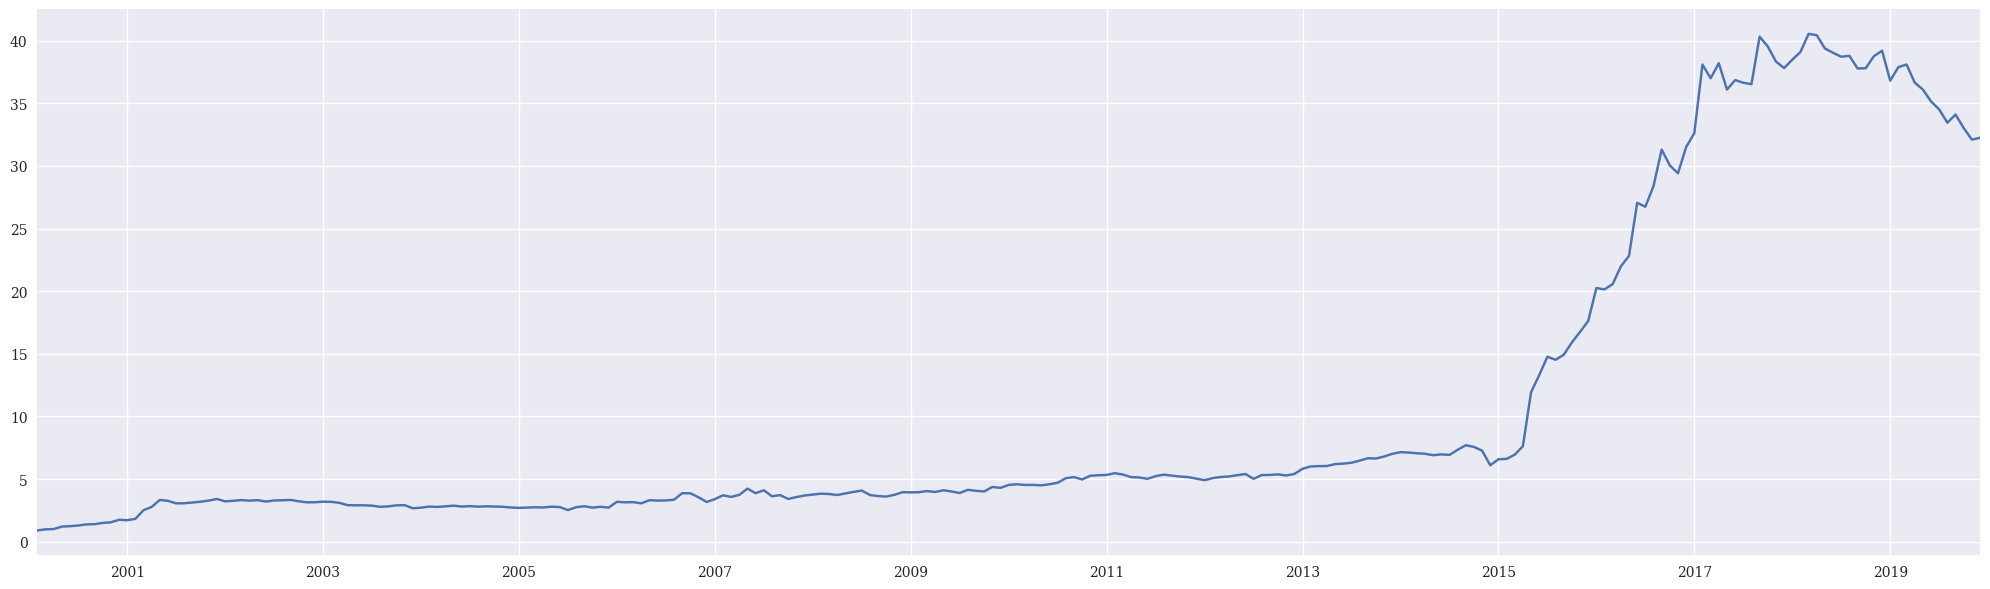

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("one_trading_method", fig_folder)
plt.show()

# In class exercise

Make position simple average.

save figure simple_average...


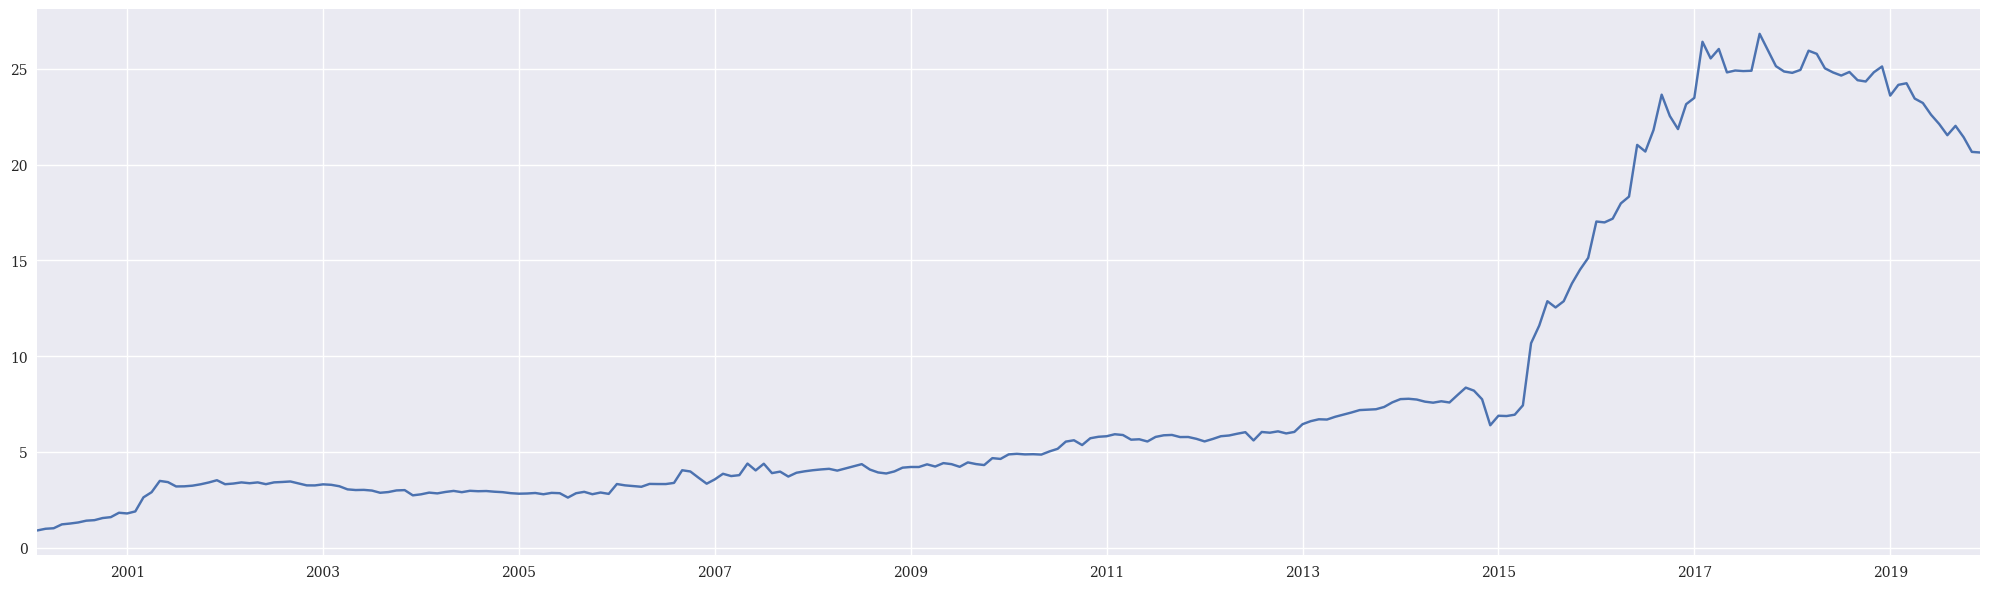

In [23]:
results = []
for i in range(len(sample.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample["status"].iloc[i][sample["status"].iloc[i] == 1].index
    # ------ 按照市值排序 ------ #
    sorted_index = sample["Cir_Mar_Val"].iloc[i][available_index].sort_values().dropna()
    # ------ 市值较小的股票做多 ------ #
    longposition = pd.Series(1, index=sorted_index[:40].index) / 40 / 2
    # ------ 市值较大的股票做空 ------ #
    shortposition = pd.Series(1, index=sorted_index[-40:].index) / 40 / 2
    # ------ 计算收益 ------ #
    current_ret = np.dot(ret.iloc[i + 1][longposition.index], longposition) -\
                  np.dot(ret.iloc[i + 1][shortposition.index], shortposition)
    results.append((sample.index[i + 1], current_ret))

# ------ 变成Series绘图 ------ #
pnl_simple_average = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl_simple_average + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("simple_average", fig_folder)
plt.show()

# In class exercise

Make holding periods into 6 months.

save figure holding_6_months...


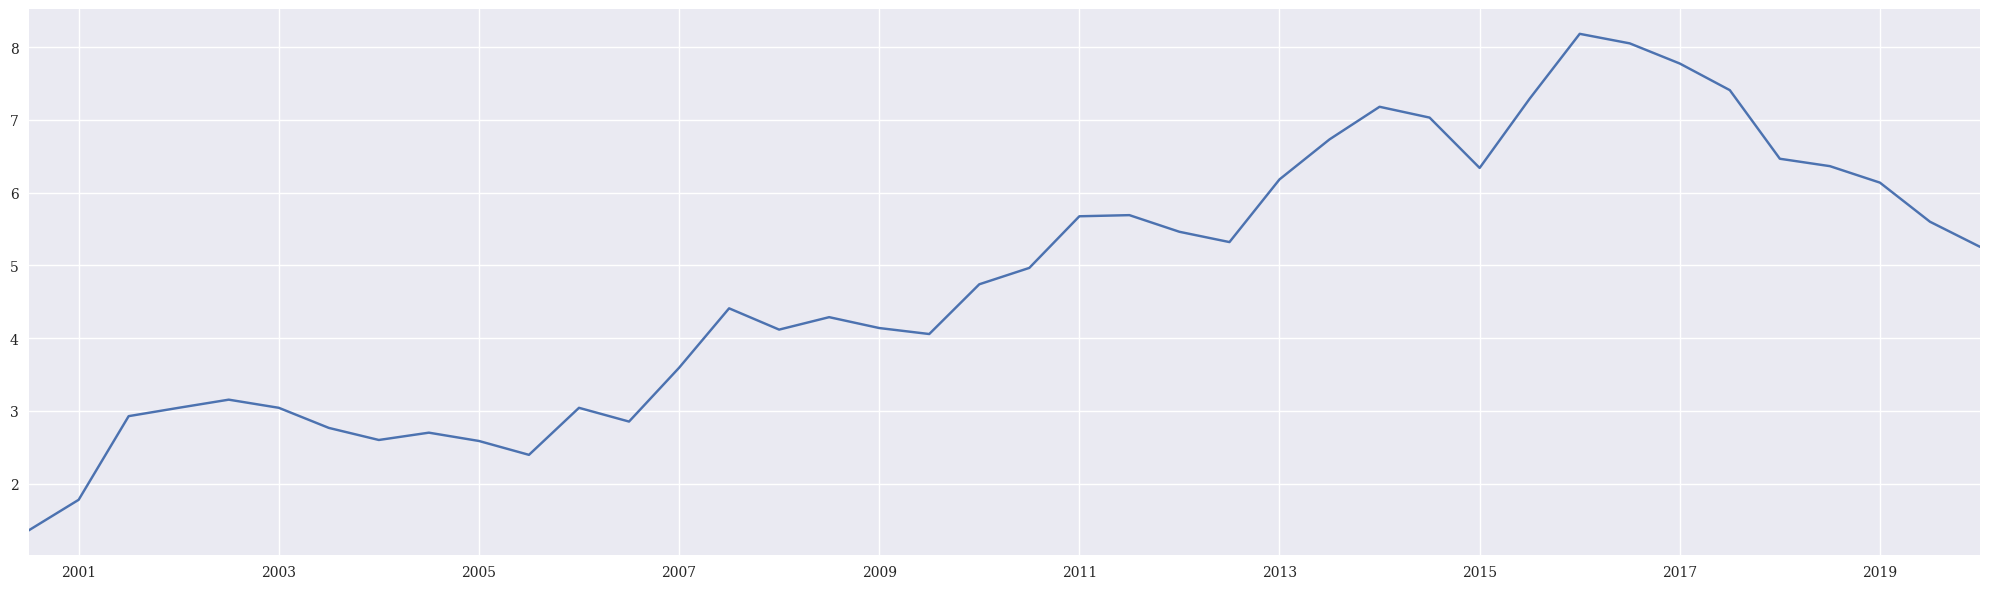

In [27]:
sample_6_months = resfile.swaplevel(0, 1, axis = 1)
sample_6_months = sample_6_months[['Close', 'Cir_Mar_Val', 'status']].resample('6M').last()
sample_6_months.sort_index(axis = 1, inplace = True)
ret_6_months = sample_6_months['Close'].pct_change()

results = []
for i in range(len(sample_6_months.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample_6_months["status"].iloc[i][sample_6_months["status"].iloc[i] == 1].index
    # ------ 按照市值排序 ------ #
    sorted_index = sample_6_months["Cir_Mar_Val"].iloc[i][available_index].sort_values().dropna()
    # ------ 市值较小的股票做多 ------ #
    longposition = pd.Series(1, index=sorted_index[:40].index) / 40 / 2
    # ------ 市值较大的股票做空 ------ #
    shortposition = pd.Series(1, index=sorted_index[-40:].index) / 40 / 2
    # ------ 计算收益 ------ #
    current_ret = np.dot(ret_6_months.iloc[i + 1][longposition.index], longposition) -\
                  np.dot(ret_6_months.iloc[i + 1][shortposition.index], shortposition)
    results.append((sample_6_months.index[i + 1], current_ret))

pnl_6_months = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl_6_months + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("holding_6_months", fig_folder)
plt.show()

# In class exercise

Make the strategy pure long.

save figure pure_long...


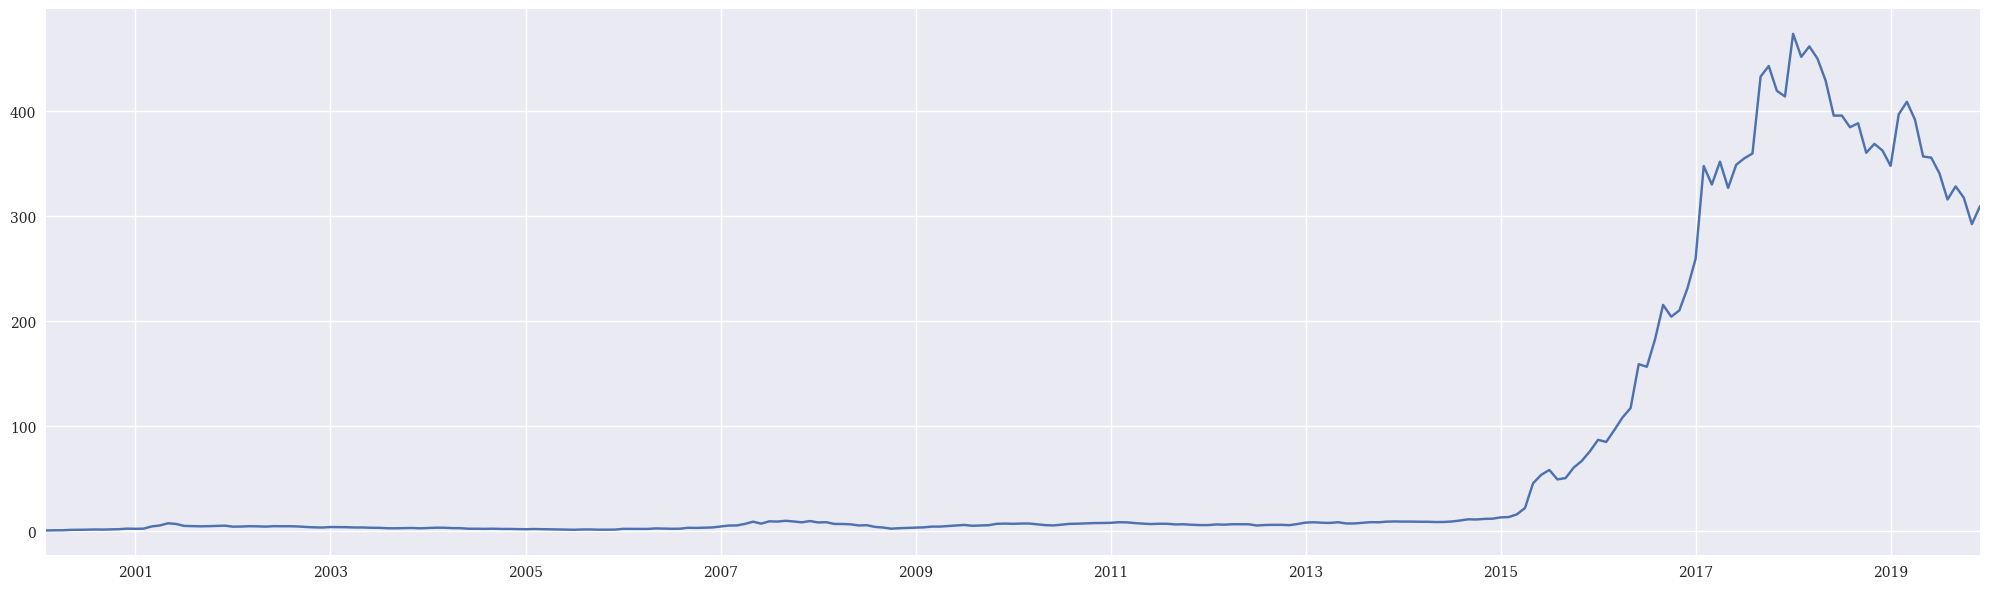

In [28]:
results = []
for i in range(len(sample.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample["status"].iloc[i][sample["status"].iloc[i] == 1].index
    # ------ 按照市值排序 ------ #
    sorted_index = sample["Cir_Mar_Val"].iloc[i][available_index].sort_values().dropna()
    # ------ 市值较小的股票做多 ------ #
    longposition = sorted_index[:40] / sorted_index[:40].sum()
    # ------ 计算收益 ------ #
    current_ret = np.dot(ret.iloc[i + 1][longposition.index], longposition)
    results.append((sample.index[i + 1], current_ret))

pnl_pure_long = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl_pure_long + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("pure_long", fig_folder)
plt.show()

# In class exercise

Make the strategy pure short.

save figure pure_short...


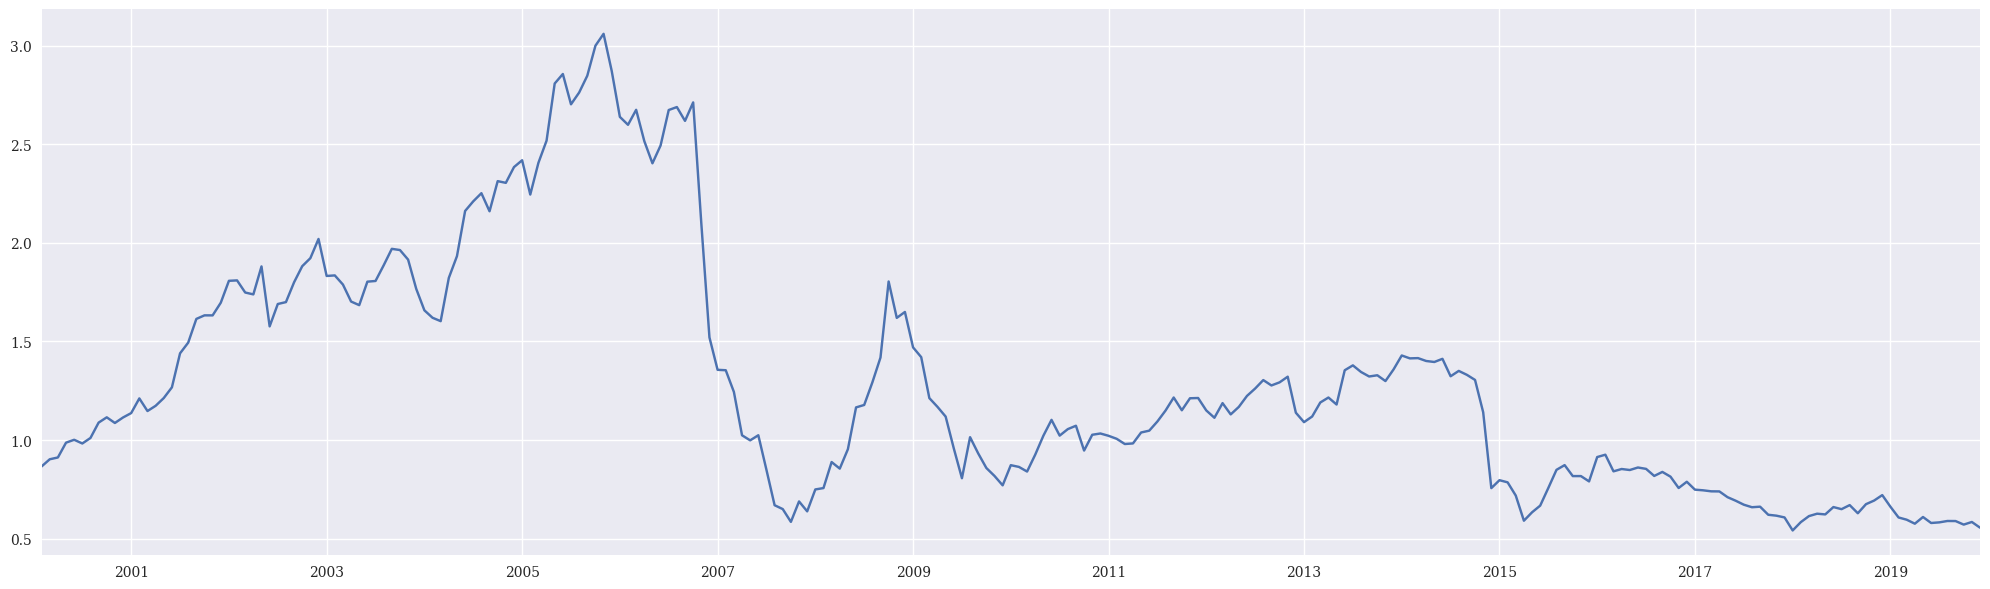

In [30]:
results = []
for i in range(len(sample.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample["status"].iloc[i][sample["status"].iloc[i] == 1].index
    # ------ 按照市值排序 ------ #
    sorted_index = sample["Cir_Mar_Val"].iloc[i][available_index].sort_values().dropna()
    # ------ 市值较大的股票做空 ------ #
    shortposition = sorted_index[-40:] / sorted_index[-40:].sum()
    # ------ 计算收益 ------ #
    current_ret = - np.dot(ret.iloc[i + 1][shortposition.index], shortposition)
    results.append((sample.index[i + 1], current_ret))

pnl_pure_short = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl_pure_short + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("pure_short", fig_folder)
plt.show()

# In class exercise

Alternative strategy: buy the stocks with largest return in the last month.

save figure largest_return...


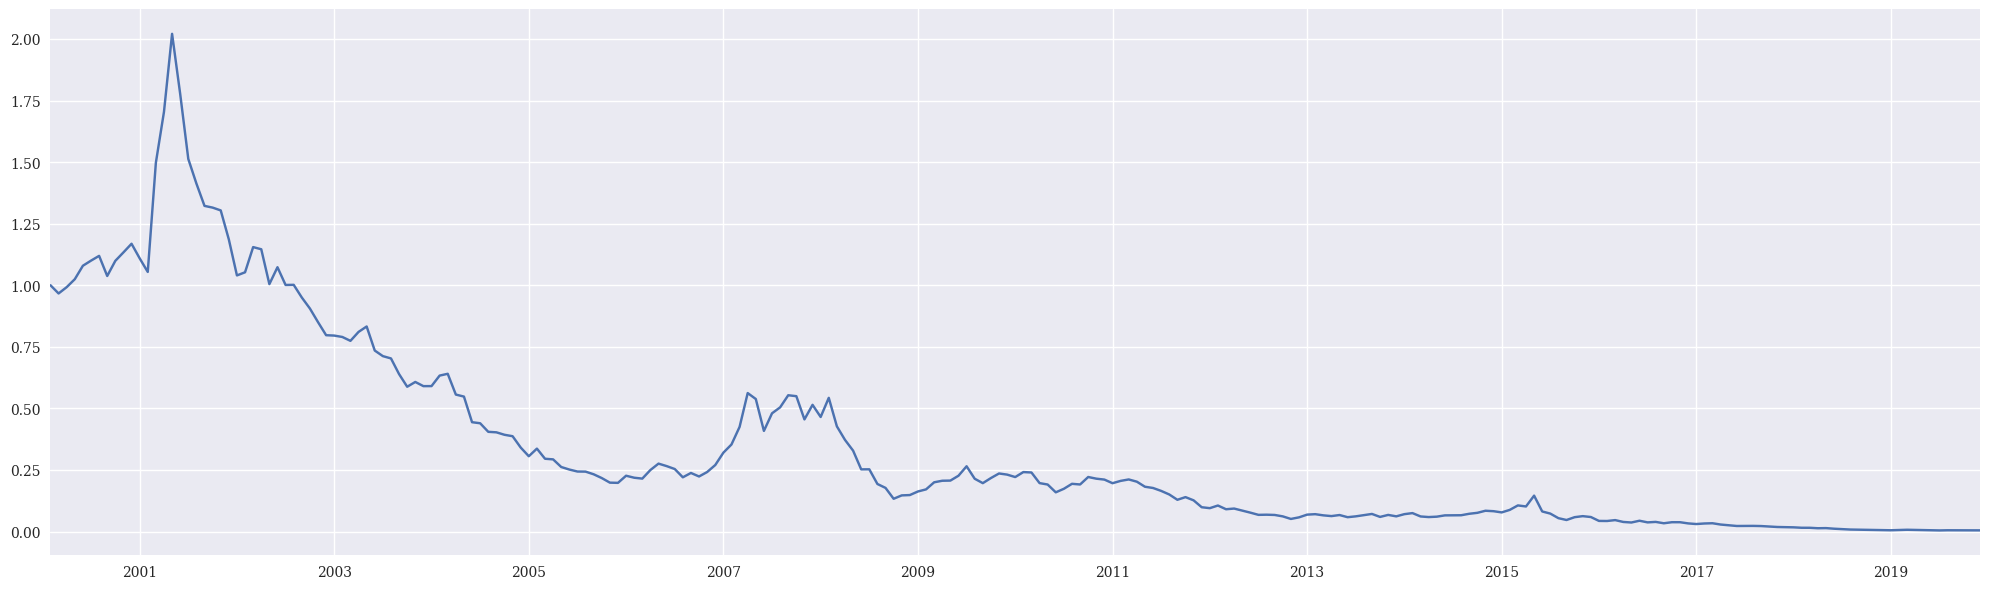

In [34]:
# ------ 月度的 ------ #
results = []
for i in range(len(sample.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample["status"].iloc[i][sample["status"].iloc[i] == 1].index
    # ------ 按照收益率排序 ------ #
    sorted_index = ret.iloc[i][available_index].sort_values().dropna()
    # ------ 选择收益最大的股票购买 ------ #
    longposition = sorted_index.iloc[-40:] / sorted_index.iloc[-40:].sum()
    # ------ 计算收益 ------ #
    current_ret = np.dot(ret.iloc[i + 1][longposition.index], longposition)
    results.append((sample.index[i + 1], current_ret))

pnl_largest_return = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl_largest_return + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("largest_return", fig_folder)
plt.show()

save figure largest_return_everyday...


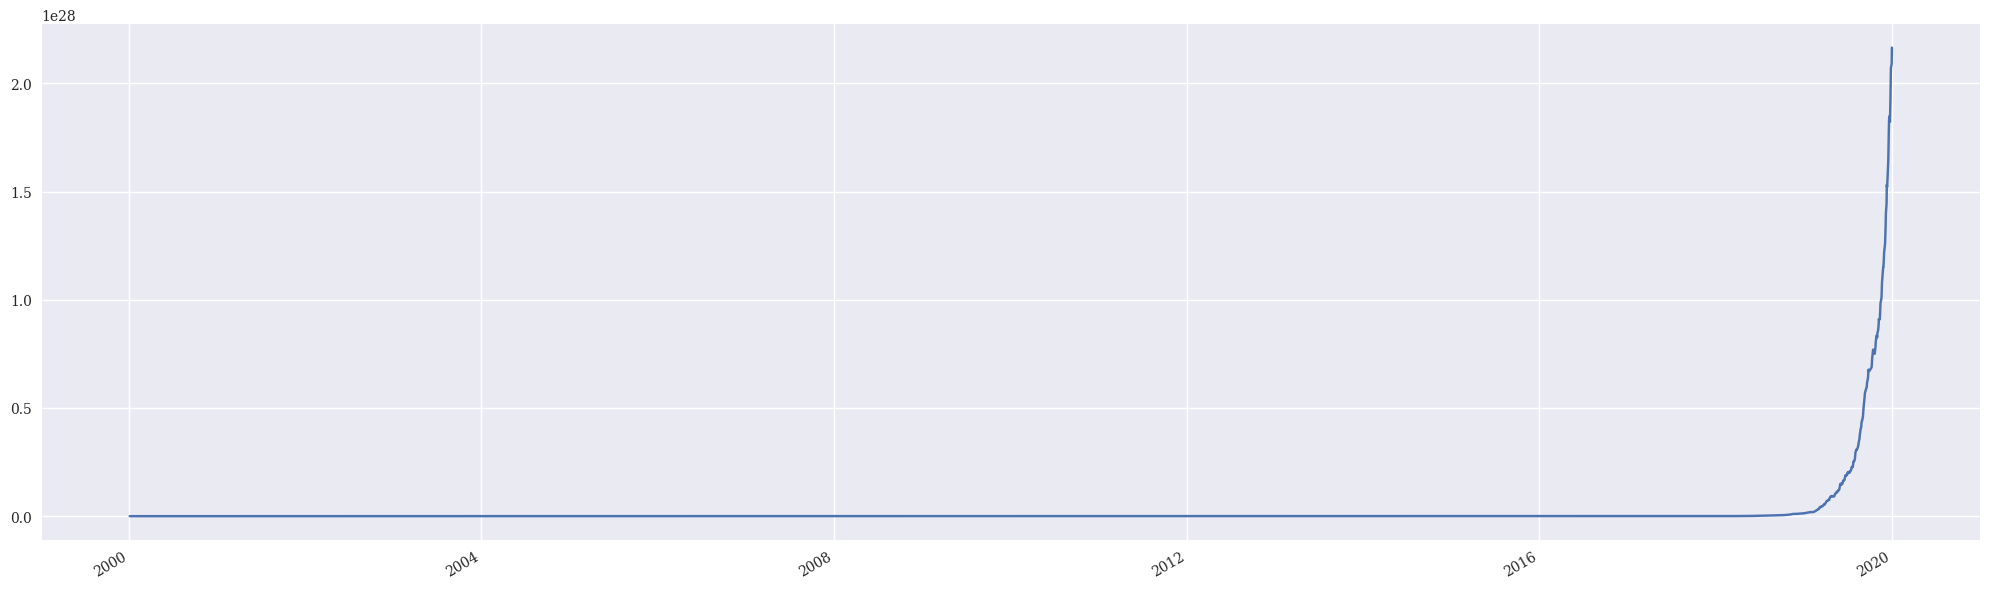

In [42]:
# ------ 日度的 ------ #
sample_everyday = resfile.swaplevel(0, 1, axis = 1)
sample_everyday = sample_everyday[['Close', 'Cir_Mar_Val', 'status']]
sample_everyday.sort_index(axis = 1, inplace = True)
ret_everyday = sample_everyday['Close'].pct_change()

results = []
for i in range(len(sample_everyday.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample_everyday["status"].iloc[i][sample_everyday["status"].iloc[i] == 1].index
    # ------ 按照收益率排序 ------ #
    sorted_index = ret_everyday.iloc[i][available_index].sort_values().dropna()
    # ------ 选择收益最大的股票购买 ------ #
    longposition = sorted_index.iloc[-40:] / sorted_index.iloc[-40:].sum()
    # ------ 计算收益 ------ #
    current_ret = np.dot(ret_everyday.iloc[i + 1][longposition.index], longposition)
    results.append((sample_everyday.index[i + 1], current_ret))

pnl_everyday = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl_everyday + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("largest_return_everyday", fig_folder)
plt.show()

save figure largest_return_everyweek...


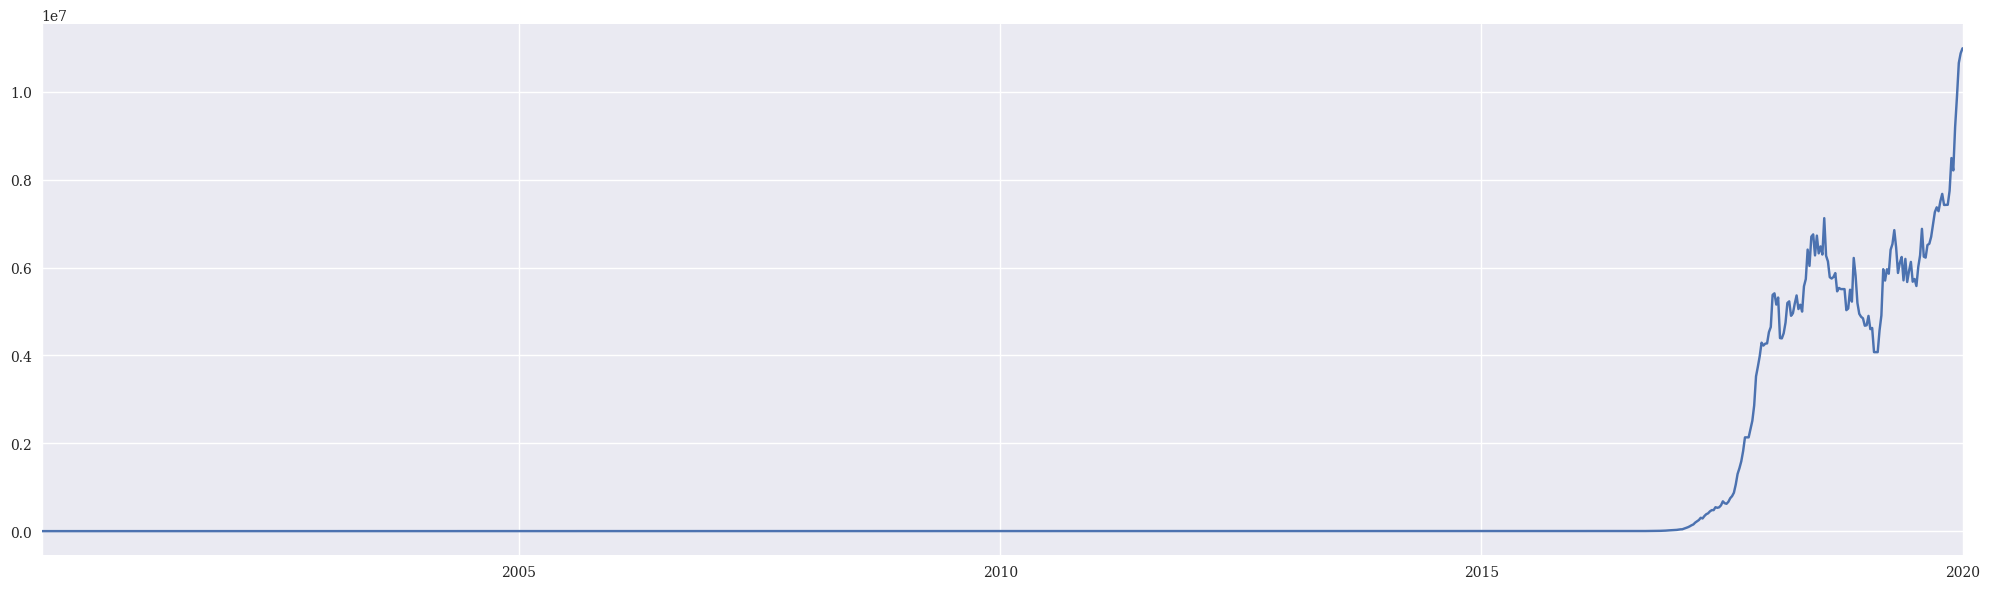

In [43]:
# ------ 周度的 ------ #
sample_everyweek = resfile.swaplevel(0, 1, axis = 1)
sample_everyweek = sample_everyweek[['Close', 'Cir_Mar_Val', 'status']].resample("1W").last()
sample_everyweek.sort_index(axis = 1, inplace = True)
ret_everyweek = sample_everyweek['Close'].pct_change()

results = []
for i in range(len(sample_everyweek.index) - 1):
    # ------ 去除无法正常交易的股票 ------ #
    available_index = sample_everyweek["status"].iloc[i][sample_everyweek["status"].iloc[i] == 1].index
    # ------ 按照收益率排序 ------ #
    sorted_index = ret_everyweek.iloc[i][available_index].sort_values().dropna()
    # ------ 选择收益最大的股票购买 ------ #
    longposition = sorted_index.iloc[-40:] / sorted_index.iloc[-40:].sum()
    # ------ 计算收益 ------ #
    current_ret = np.dot(ret_everyweek.iloc[i + 1][longposition.index], longposition)
    results.append((sample_everyweek.index[i + 1], current_ret))

pnl_everyday = pd.Series(list(zip(*results))[1], index=list(zip(*results))[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
(pnl_everyday + 1).cumprod().plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("largest_return_everyweek", fig_folder)
plt.show()

# OLS Regression

# T-tests